In [1]:
import pandas as pd

In [2]:
#import the dataset
df = pd.read_excel('ermsmallacounts14to16_Week3.xlsx', header=1, skiprows=0)
df.head()

,Address,Reading Type,Usage Period From,Usage Period To,Usage Days,Peak kWhs,Off Peak kWhs,Controlled Load kWhs,Green House Gas Emissions (Tonnes),Total Consumption kWhs
0,"Interchange Unit 11 30 BROUGHAM ST, GEELONG, V...",Actual,20140708,20140731,24.0,3838.877,1005.891,0.0,5.6199,4844.768
1,"14 HANCOCK ST, DRYSDALE, VIC 3222",Actual,20140708,20140731,24.0,3027.456,709.499,0.0,4.3349,3736.955
2,"9 CLARENCE ST, GEELONG WEST, VIC 3218",Actual,20140708,20140731,24.0,3081.995,722.187,0.0,4.4129,3804.182
3,"DREWIN PARK, 351 WANDANA DR, CERES, VIC 3221",Actual,20140708,20140731,24.0,0.000,0.000,0.0,0.0000,0.000
4,"Reserve 240 PLANTATION RD, CORIO, VIC 3214",Actual,20140708,20140731,24.0,8.452,0.000,0.0,0.0098,8.452


In [74]:
df.dtypes

Address                                object
Reading Type                           object
Usage Period From                       int64
Usage Period To                         int64
Usage Days                            float64
Peak kWhs                             float64
Off Peak kWhs                         float64
Controlled Load kWhs                  float64
Green House Gas Emissions (Tonnes)    float64
Total Consumption kWhs                float64
dtype: object

In [128]:
#Converting the data types for Usage Periods
df['Usage Period From'] = pd.to_datetime(df['Usage Period From'], format='%Y%m%d')

df['Usage Period To'] = pd.to_datetime(df['Usage Period To'], format='%Y%m%d')

df.head()

,Address,Reading Type,Usage Period From,Usage Period To,Usage Days,Peak kWhs,Off Peak kWhs,Controlled Load kWhs,Green House Gas Emissions (Tonnes),Total Consumption kWhs,City,Fiscal Year,Quarter,Usage Year
0,"Interchange Unit 11 30 BROUGHAM ST, GEELONG, V...",Actual,2014-07-08,2014-07-31,23,0.256316,0.132022,0.0,0.273957,0.283406,GEELONG,14-15,1,2014
1,"14 HANCOCK ST, DRYSDALE, VIC 3222",Actual,2014-07-08,2014-07-31,23,0.202139,0.093121,0.0,0.211316,0.218602,DRYSDALE,14-15,1,2014
2,"9 CLARENCE ST, GEELONG WEST, VIC 3218",Actual,2014-07-08,2014-07-31,23,0.205780,0.094786,0.0,0.215119,0.222534,GEELONG WEST,14-15,1,2014
3,"DREWIN PARK, 351 WANDANA DR, CERES, VIC 3221",Actual,2014-07-08,2014-07-31,23,0.000000,0.000000,0.0,0.000000,0.000000,CERES,14-15,1,2014
4,"Reserve 240 PLANTATION RD, CORIO, VIC 3214",Actual,2014-07-08,2014-07-31,23,0.000564,0.000000,0.0,0.000478,0.000494,CORIO,14-15,1,2014


In [76]:
df.isna().sum()

Address                                 0
Reading Type                            0
Usage Period From                       0
Usage Period To                         0
Usage Days                            180
Peak kWhs                             309
Off Peak kWhs                           0
Controlled Load kWhs                    0
Green House Gas Emissions (Tonnes)      0
Total Consumption kWhs                  0
dtype: int64

In [77]:
df.shape

(6873, 10)

In [129]:
# Calculate the usage days by subtracting the "Usage Period From" from "Usage Period To" column
df['Usage Days'] = (df['Usage Period To'] - df['Usage Period From']).dt.days + 1
df['Usage Days'].fillna(0, inplace=True)



In [79]:
df.isna().sum()

Address                                 0
Reading Type                            0
Usage Period From                       0
Usage Period To                         0
Usage Days                              0
Peak kWhs                             309
Off Peak kWhs                           0
Controlled Load kWhs                    0
Green House Gas Emissions (Tonnes)      0
Total Consumption kWhs                  0
dtype: int64

In [80]:
#Handeling missing values in Peak KWhs
df['Peak kWhs'] = df['Peak kWhs'].fillna(df['Total Consumption kWhs'] - df['Off Peak kWhs'] - df['Controlled Load kWhs'])


In [81]:
df.isna().sum()

Address                               0
Reading Type                          0
Usage Period From                     0
Usage Period To                       0
Usage Days                            0
Peak kWhs                             0
Off Peak kWhs                         0
Controlled Load kWhs                  0
Green House Gas Emissions (Tonnes)    0
Total Consumption kWhs                0
dtype: int64

In [130]:
#Creating the new column Usage Year
df['Usage Year'] = df['Usage Period From'].dt.year
df.head()


,Address,Reading Type,Usage Period From,Usage Period To,Usage Days,Peak kWhs,Off Peak kWhs,Controlled Load kWhs,Green House Gas Emissions (Tonnes),Total Consumption kWhs,City,Fiscal Year,Quarter,Usage Year
0,"Interchange Unit 11 30 BROUGHAM ST, GEELONG, V...",Actual,2014-07-08,2014-07-31,24,0.256316,0.132022,0.0,0.273957,0.283406,GEELONG,14-15,1,2014
1,"14 HANCOCK ST, DRYSDALE, VIC 3222",Actual,2014-07-08,2014-07-31,24,0.202139,0.093121,0.0,0.211316,0.218602,DRYSDALE,14-15,1,2014
2,"9 CLARENCE ST, GEELONG WEST, VIC 3218",Actual,2014-07-08,2014-07-31,24,0.205780,0.094786,0.0,0.215119,0.222534,GEELONG WEST,14-15,1,2014
3,"DREWIN PARK, 351 WANDANA DR, CERES, VIC 3221",Actual,2014-07-08,2014-07-31,24,0.000000,0.000000,0.0,0.000000,0.000000,CERES,14-15,1,2014
4,"Reserve 240 PLANTATION RD, CORIO, VIC 3214",Actual,2014-07-08,2014-07-31,24,0.000564,0.000000,0.0,0.000478,0.000494,CORIO,14-15,1,2014


In [167]:
#New Column Fiscal Year
def get_fiscal_year(date):
    year = date.year
    if date.month >= 7:
        year += 1
    fiscal_year = str(year-1)[2:] + '-' + str(year)[2:]
    return fiscal_year

df['Fiscal Year'] = df['Usage Period From'].apply(get_fiscal_year)


In [177]:
#New column Quarter
def get_quarter_range_australia(row):
    from_quarter = get_quarter_australia(row['Usage Period From'])
    to_quarter = get_quarter_australia(row['Usage Period To'])

    if from_quarter == to_quarter:
        return str(from_quarter)
    else:
        return f"{from_quarter}-{to_quarter}"


def get_quarter_australia(date):
    month = date.month

    if month in [7, 8, 9]:
        return 1
    elif month in [10, 11, 12]:
        return 2
    elif month in [1, 2, 3]:
        return 3
    else:
        return 4


df['Quarter'] = df.apply(get_quarter_range_australia, axis=1)


In [178]:
 df[df['Usage Days'] > 45]

,Address,Reading Type,Usage Period From,Usage Period To,Usage Days,Peak kWhs,Off Peak kWhs,Controlled Load kWhs,Green House Gas Emissions (Tonnes),Total Consumption kWhs,City,Fiscal Year,Quarter,Usage Year
539,"HAYMARKET PARKING, MYERS ST, GEELONG, VIC 3220",Actual,2014-07-16,2014-09-14,61,NaN,0.000000,0.0,0.010018,1.036491e-02,GEELONG,14-15,1,2014
822,"REC RESERVE, GRANVILLE ST, DRYSDALE, VIC 3222",Estimated,2014-08-13,2014-09-29,48,4.266353e-02,0.041932,0.0,0.054198,5.606758e-02,DRYSDALE,14-15,1,2014
823,"ST MARYS LIGHTING, LATROBE TCE, GEELONG, VIC 3220",Actual,2014-07-04,2014-10-01,90,9.347604e-03,0.040687,0.0,0.025446,2.632379e-02,GEELONG,14-15,1-2,2014
825,"(PUMP), SHARLAND PARK RESERVE, LOMANDRA AVE, H...",Actual,2014-07-22,2014-10-07,78,1.335372e-07,0.000000,0.0,0.000000,1.169946e-07,HAMLYN HEIGHTS,14-15,1-2,2014
826,"(OPP), ORCHARD ST- TOILET BLOCK, RYRIE ST, GEE...",Actual,2014-07-09,2014-10-20,104,0.000000e+00,0.000000,0.0,0.000000,0.000000e+00,GEELONG,14-15,1-2,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6592,"Interchange Unit 11 30 BROUGHAM ST, GEELONG, V...",Actual,2016-03-22,2016-06-21,92,1.962997e-01,0.065624,0.0,0.202907,2.012308e-01,GEELONG,15-16,3-4,2016
6593,"Interchange Unit 11 30 BROUGHAM ST, GEELONG, V...",Actual,2016-03-22,2016-06-21,92,1.615800e-01,0.070874,0.0,0.174595,1.731521e-01,GEELONG,15-16,3-4,2016
6594,"Early Learning Centre Geelong Road, BARWON HEA...",Actual,2016-03-24,2016-06-26,95,5.531779e-01,0.000000,0.0,0.488691,4.846503e-01,BARWON HEADS,15-16,3-4,2016
6595,"QUEENS PARK, HIGHTON, VIC 3216",Actual,2016-03-29,2016-06-27,91,1.896228e-01,0.000000,0.0,0.167517,1.661324e-01,HIGHTON,15-16,3-4,2016


In [181]:
df.tail()

,Address,Reading Type,Usage Period From,Usage Period To,Usage Days,Peak kWhs,Off Peak kWhs,Controlled Load kWhs,Green House Gas Emissions (Tonnes),Total Consumption kWhs,City,Fiscal Year,Quarter,Usage Year
6868,"100 MOORABOOL ST, GEELONG, VIC 3220",Actual,2016-06-01,2016-06-30,30,0.024319,0.024550,0.0,0.032520,0.032249,GEELONG,15-16,4,2016
6869,"NORLANE KINDER 11 GERBERA AVE, NORLANE, VIC 3214",Actual,2016-06-01,2016-06-30,30,0.000808,0.001903,0.0,0.001570,0.001556,NORLANE,15-16,4,2016
6870,"Infant Welfare 17 TOWNSEND RD, WHITTINGTON, VI...",Actual,2016-06-01,2016-06-30,30,0.001498,0.000000,0.0,0.001321,0.001312,WHITTINGTON,15-16,4,2016
6871,"PARK BBQ, FAIRVISTA AVE, LEOPOLD, VIC 3224",Actual,2016-06-01,2016-06-30,30,0.000381,0.000002,0.0,0.000336,0.000335,LEOPOLD,15-16,4,2016
6872,"COGG, 4 SHELL RD, OCEAN GROVE, VIC 3226",Actual,2016-06-01,2016-06-30,30,0.480647,0.251893,0.0,0.537818,0.533373,OCEAN GROVE,15-16,4,2016


In [182]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Reading Type Encoded'] = label_encoder.fit_transform(df['Reading Type'])
df.head()

,Address,Reading Type,Usage Period From,Usage Period To,Usage Days,Peak kWhs,Off Peak kWhs,Controlled Load kWhs,Green House Gas Emissions (Tonnes),Total Consumption kWhs,City,Fiscal Year,Quarter,Usage Year,Reading Type Encoded
0,"Interchange Unit 11 30 BROUGHAM ST, GEELONG, V...",Actual,2014-07-08,2014-07-31,24,0.256316,0.132022,0.0,0.273957,0.283406,GEELONG,14-15,1,2014,0
1,"14 HANCOCK ST, DRYSDALE, VIC 3222",Actual,2014-07-08,2014-07-31,24,0.202139,0.093121,0.0,0.211316,0.218602,DRYSDALE,14-15,1,2014,0
2,"9 CLARENCE ST, GEELONG WEST, VIC 3218",Actual,2014-07-08,2014-07-31,24,0.205780,0.094786,0.0,0.215119,0.222534,GEELONG WEST,14-15,1,2014,0
3,"DREWIN PARK, 351 WANDANA DR, CERES, VIC 3221",Actual,2014-07-08,2014-07-31,24,0.000000,0.000000,0.0,0.000000,0.000000,CERES,14-15,1,2014,0
4,"Reserve 240 PLANTATION RD, CORIO, VIC 3214",Actual,2014-07-08,2014-07-31,24,0.000564,0.000000,0.0,0.000478,0.000494,CORIO,14-15,1,2014,0


In [183]:
#calculate total consumption year wise for all addresses. 
total_consumption_yearly = df.groupby(['Address', 'Fiscal Year'])['Total Consumption kWhs'].sum().reset_index()
total_consumption_yearly

,Address,Fiscal Year,Total Consumption kWhs
0,"(Adj) 118 CORIO ST, GEELONG, VIC 3220",14-15,0.127717
1,"(Adj) 118 CORIO ST, GEELONG, VIC 3220",15-16,0.370657
2,"(CNR), BELLERINE PUBLIC LIGHTING, MALOP ST, GE...",14-15,0.196638
3,"(CNR), BELLERINE PUBLIC LIGHTING, MALOP ST, GE...",15-16,0.202047
4,"(CNR), BIESKE RD, HEYERS RD, GROVEDALE, VIC 3216",14-15,0.554968
...,...,...,...
603,"WORKSHOP, RICHMOND CRES, GEELONG, VIC 3220",15-16,0.000681
604,"Wool Sale Area 26 MOORABOOL ST, GEELONG, VIC 3220",14-15,0.304509
605,"Wool Sale Area 26 MOORABOOL ST, GEELONG, VIC 3220",15-16,0.258133
606,"ZEBRA CROSSING, PATULLOS RD, LARA, VIC 3212",14-15,0.161939


In [120]:
#Calculate total consumption for each address in that quarter
quarterly_total_consumption = df.groupby(['Address', 'Fiscal Year', 'Quarter'])['Total Consumption kWhs'].sum().reset_index()
pd.set_option('display.max_rows', None)
quarterly_total_consumption

,Address,Fiscal Year,Quarter,Total Consumption kWhs
0,"(Adj) 118 CORIO ST, GEELONG, VIC 3220",14-15,1,0.001
1,"(Adj) 118 CORIO ST, GEELONG, VIC 3220",14-15,2,0.000
2,"(Adj) 118 CORIO ST, GEELONG, VIC 3220",14-15,3,1499.692
3,"(Adj) 118 CORIO ST, GEELONG, VIC 3220",14-15,4,683.607
4,"(Adj) 118 CORIO ST, GEELONG, VIC 3220",15-16,1,4311.962
5,"(Adj) 118 CORIO ST, GEELONG, VIC 3220",15-16,2,1161.155
6,"(Adj) 118 CORIO ST, GEELONG, VIC 3220",15-16,3,863.191
7,"(CNR), BELLERINE PUBLIC LIGHTING, MALOP ST, GE...",14-15,1,789.373
8,"(CNR), BELLERINE PUBLIC LIGHTING, MALOP ST, GE...",14-15,2,865.314
9,"(CNR), BELLERINE PUBLIC LIGHTING, MALOP ST, GE...",14-15,3,848.235


In [135]:
from sklearn.preprocessing import MinMaxScaler
numeric_columns = ['Peak kWhs', 'Off Peak kWhs', 'Controlled Load kWhs', 'Green House Gas Emissions (Tonnes)', 'Total Consumption kWhs']

# Min-Max Scaling
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [132]:
df['Address'].nunique()

316

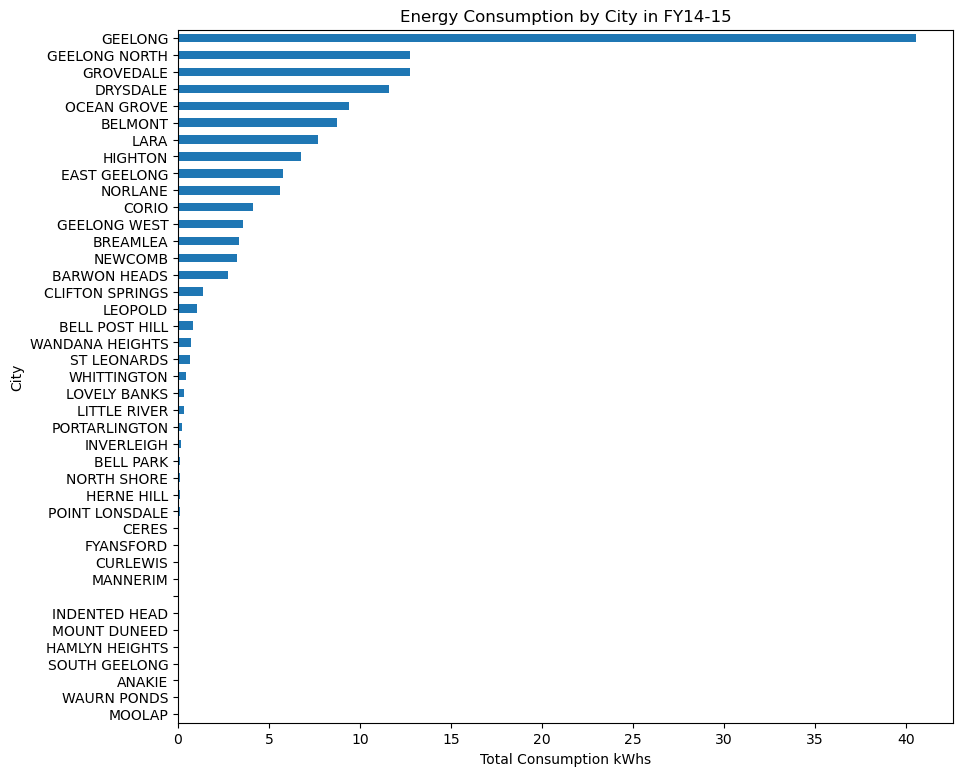

In [139]:
#Energy Consumption Analysis
import matplotlib.pyplot as plt

df['City'] = df['Address'].str.split(',').str[-2].str.strip()  
filtered_df= df[df['Fiscal Year']== '14-15']
city_total_consumption = filtered_df.groupby('City')['Total Consumption kWhs'].sum().sort_values(ascending=True)

city_total_consumption.plot(kind='barh', figsize=(10, 9))
plt.ylabel('City')
plt.xlabel('Total Consumption kWhs')
plt.title('Energy Consumption by City in FY14-15')
plt.show()





In [164]:
high_consuming_cities = city_total_consumption.nlargest(5)
print('High-Consuming Cities:')
high_consuming_cities

High-Consuming Cities:


City
GEELONG          40.547661
GEELONG NORTH    12.761942
GROVEDALE        12.728411
DRYSDALE         11.604028
OCEAN GROVE       9.365042
Name: Total Consumption kWhs, dtype: float64

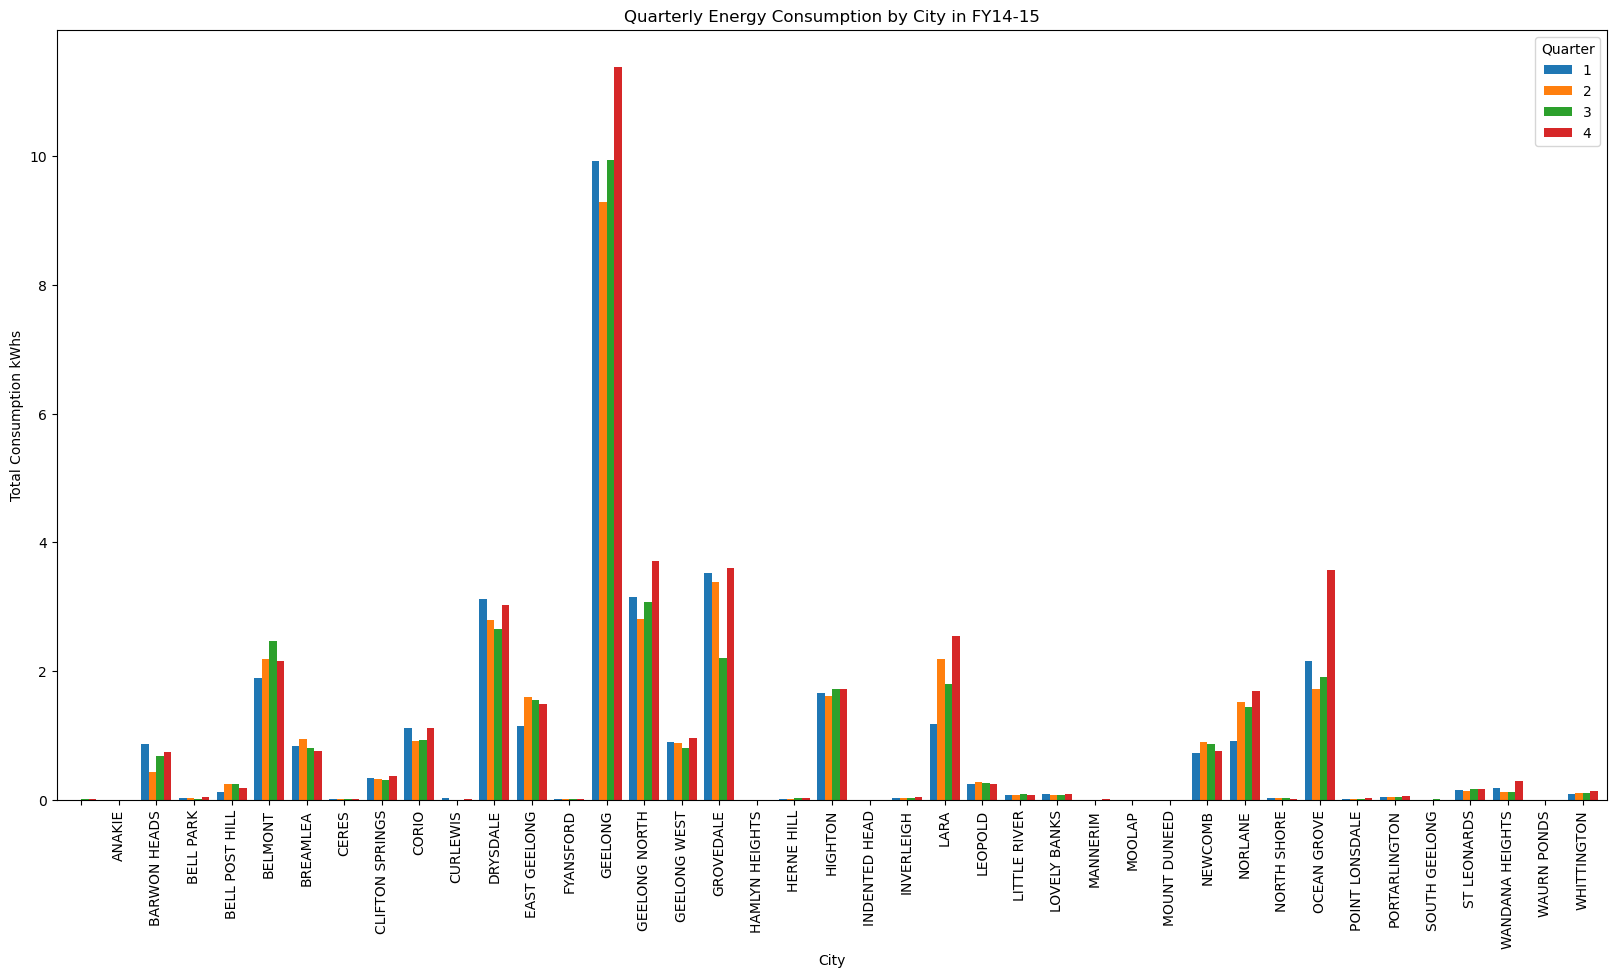

In [184]:
#Quarterly comparision by city
quarterly_consumption = filtered_df.groupby(['City', 'Quarter'])['Total Consumption kWhs'].sum().unstack()

quarterly_consumption.plot(kind='bar', figsize=(20, 10), width= 0.8)
plt.xlabel('City')
plt.ylabel('Total Consumption kWhs')
plt.title('Quarterly Energy Consumption by City in FY14-15')
plt.legend(title='Quarter')
plt.show()


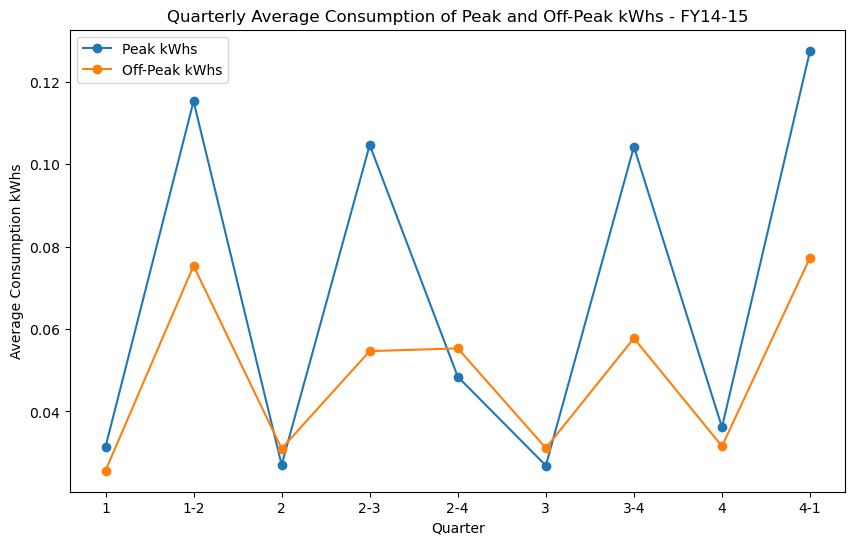

In [185]:
#quarterly analysis of Peak and Off peak usage in FY14-15
filtered_df = df[df['Fiscal Year'] == '14-15']

quarterly_peak_usage = filtered_df.groupby(filtered_df['Quarter'])['Peak kWhs'].mean()
quarterly_offpeak_usage = filtered_df.groupby(filtered_df['Quarter'])['Off Peak kWhs'].mean()

plt.figure(figsize=(10, 6))
quarterly_peak_usage.plot(marker='o', label='Peak kWhs')
quarterly_offpeak_usage.plot(marker='o', label='Off-Peak kWhs')
plt.xlabel('Quarter')
plt.ylabel('Average Consumption kWhs')
plt.title('Quarterly Average Consumption of Peak and Off-Peak kWhs - FY14-15')
plt.legend()
plt.show()


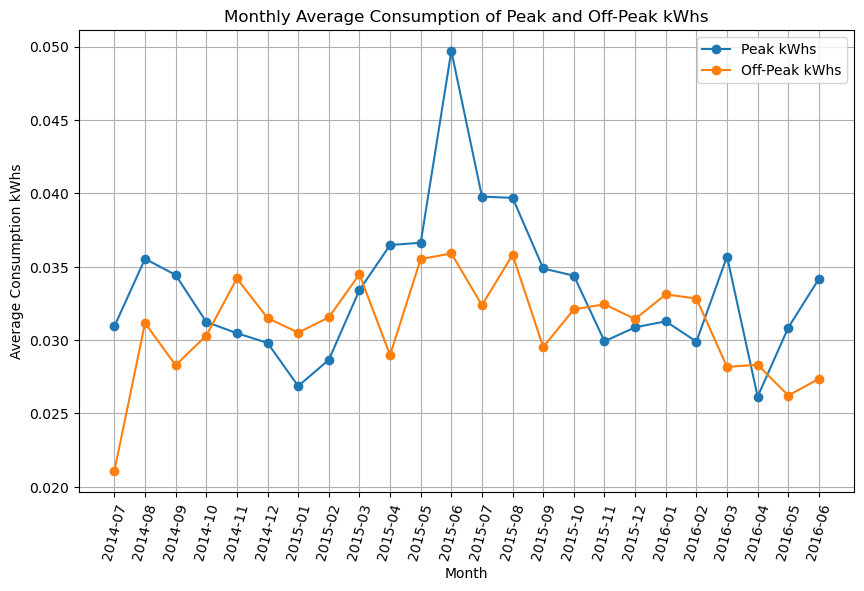

In [127]:
#monthly analysis
monthly_consumption_w = df.groupby(df['Usage Period From'].dt.to_period('M')).agg({'Peak kWhs': 'mean', 'Off Peak kWhs': 'mean'}).reset_index()

#onto the plottiong
monthly_consumption_w['Usage Period From'] = monthly_consumption_w['Usage Period From'].astype(str)

plt.figure(figsize=(10, 6))
plt.plot(monthly_consumption_w['Usage Period From'], monthly_consumption_w['Peak kWhs'], marker='o', label='Peak kWhs')
plt.plot(monthly_consumption_w['Usage Period From'], monthly_consumption_w['Off Peak kWhs'], marker='o', label='Off-Peak kWhs')

plt.xlabel('Month')
plt.ylabel('Average Consumption kWhs')
plt.title('Monthly Average Consumption of Peak and Off-Peak kWhs')

plt.legend()
plt.grid(True)
plt.xticks(rotation=75)
plt.show()



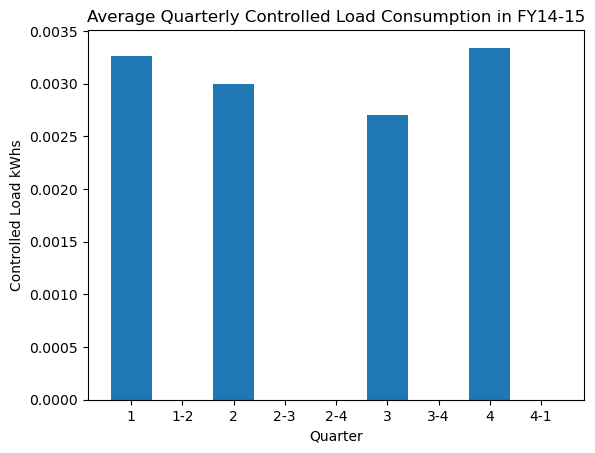

In [187]:
# Controlled Load Analysis - Quarterly analysis of Controlled Load Consumption

filtered_df = df[df['Fiscal Year'] == '14-15']
quarterly_controlled_load = filtered_df.groupby('Quarter')['Controlled Load kWhs'].mean()


plt.bar(quarterly_controlled_load.index, quarterly_controlled_load)
plt.xlabel('Quarter')
plt.ylabel('Controlled Load kWhs')
plt.title('Average Quarterly Controlled Load Consumption in FY14-15')

plt.show()




In [118]:
#Monthly Analysis For Controlled Load

monthly_consumption_a = df.groupby(df['Usage Period From'].dt.to_period('M'))['Controlled Load kWhs'].mean().reset_index()
monthly_consumption_a = monthly_consumption_a.rename(columns={'Usage Period From': 'Months', 'Controlled Load kWhs': 'Average Controlled Load kWhs'})

monthly_consumption_a

,Months,Average Controlled Load kWhs
0,2014-07,0.002801
1,2014-08,0.003409
2,2014-09,0.003296
3,2014-10,0.003028
4,2014-11,0.002871
5,2014-12,0.002708
6,2015-01,0.002663
7,2015-02,0.002349
8,2015-03,0.002757
9,2015-04,0.002974


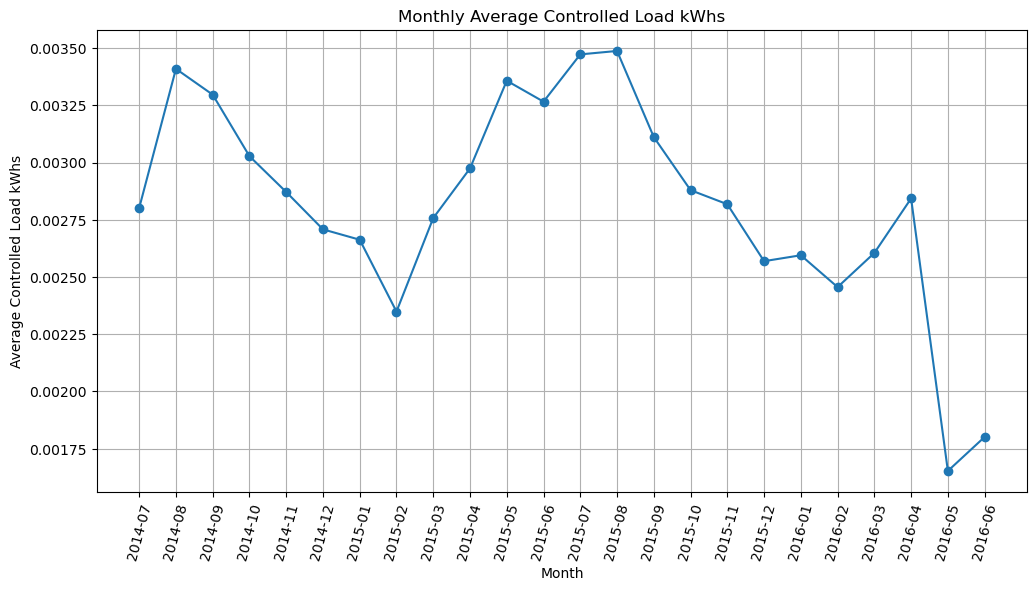

In [117]:
#onto the plotting

monthly_consumption_a['Months'] = monthly_consumption['Months'].astype(str)

plt.figure(figsize=(12, 6))

plt.plot(monthly_consumption_a['Months'], monthly_consumption_a['Average Controlled Load kWhs'], marker='o')
plt.xlabel('Month')
plt.ylabel('Average Controlled Load kWhs')
plt.title('Monthly Average Controlled Load kWhs')
plt.xticks(rotation=75)
plt.grid(True)
plt.show()


In [64]:
#Greenhouse Gas emissions analysis

filtered_df = df[df['Fiscal Year'] == '14-15']

total_emissions = filtered_df.groupby('City')['Green House Gas Emissions (Tonnes)'].sum().reset_index()
total_emissions = total_emissions[total_emissions['City'] != '']

total_emissions_sorted = total_emissions.sort_values('Green House Gas Emissions (Tonnes)', ascending=False)
total_emissions_sorted

,City,Green House Gas Emissions (Tonnes)
14,GEELONG,39.934371
15,GEELONG NORTH,12.571313
17,GROVEDALE,12.505109
11,DRYSDALE,11.409081
33,OCEAN GROVE,9.235690
5,BELMONT,8.571059
23,LARA,7.598695
20,HIGHTON,6.631112
12,EAST GEELONG,5.698072
31,NORLANE,5.519567


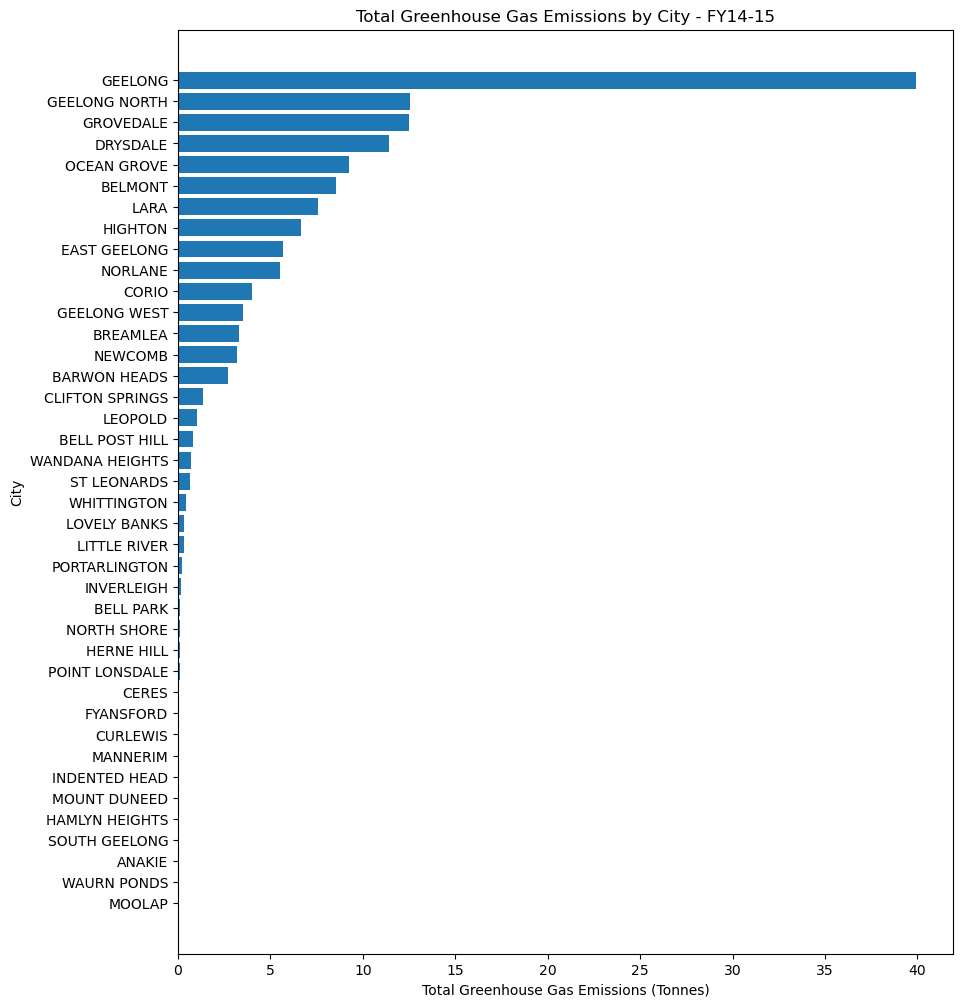

In [65]:
#plotting the outcome
total_emissions_sorted_b = total_emissions.sort_values('Green House Gas Emissions (Tonnes)', ascending=True)

plt.figure(figsize=(10, 12))
plt.barh(total_emissions_sorted_b['City'], total_emissions_sorted_b['Green House Gas Emissions (Tonnes)'])
plt.xlabel('Total Greenhouse Gas Emissions (Tonnes)')
plt.ylabel('City')
plt.title('Total Greenhouse Gas Emissions by City - FY14-15')
plt.show()


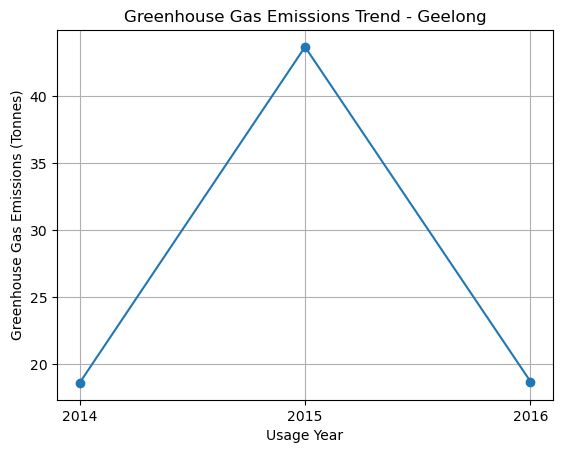

In [63]:
# Trends for Geelong
geelong_emissions = df[df['City'] == 'GEELONG']

# Total greenhouse gas emissions by year
yearly_emissions = geelong_emissions.groupby('Usage Year')['Green House Gas Emissions (Tonnes)'].sum()


plt.plot(yearly_emissions.index, yearly_emissions.values, marker='o', linestyle='-')
plt.xlabel('Usage Year')
plt.ylabel('Greenhouse Gas Emissions (Tonnes)')
plt.title('Greenhouse Gas Emissions Trend - Geelong')
plt.grid(True)

plt.xticks(yearly_emissions.index.astype(int))

plt.show()


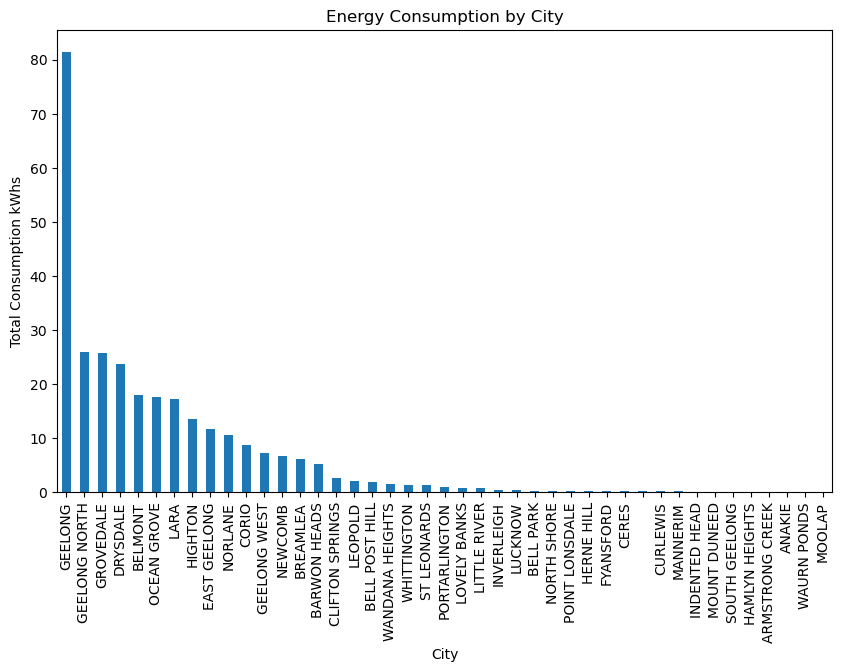

In [68]:
# Location Based Analysis - Total consumption kWhs by city

city_total_consumption = df.groupby('City')['Total Consumption kWhs'].sum()

city_total_consumption = city_total_consumption.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
city_total_consumption.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Total Consumption kWhs')
plt.title('Energy Consumption by City')

plt.show()


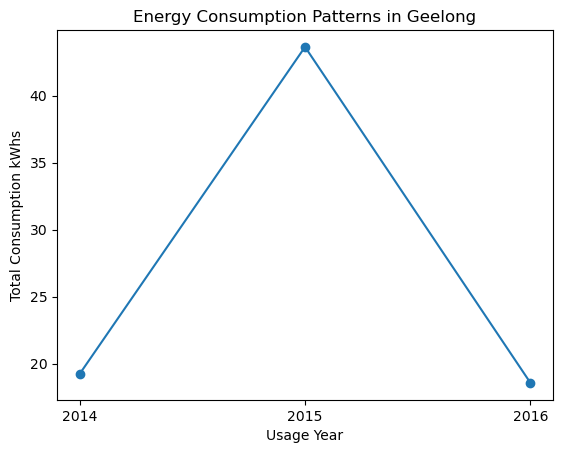

In [79]:
#Further Analysis on Geelong

geelong_data = df[df['City'] == 'GEELONG']


yearly_consumption = geelong_data.groupby('Usage Year')['Total Consumption kWhs'].sum()


plt.plot(yearly_consumption.index, yearly_consumption.values, marker='o')
plt.xlabel('Usage Year')
plt.ylabel('Total Consumption kWhs')
plt.title('Energy Consumption Patterns in Geelong')

plt.xticks(yearly_emissions.index.astype(int))
plt.show()


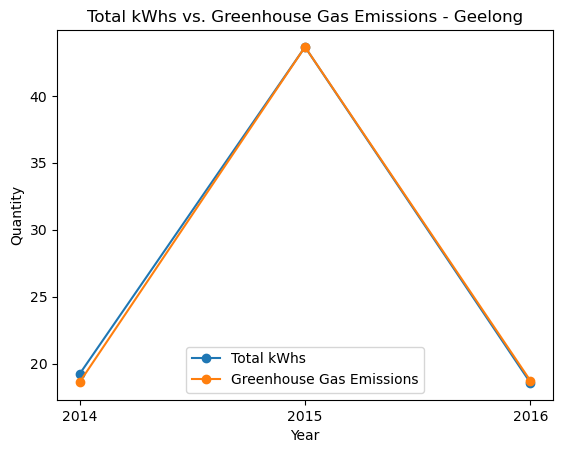

In [90]:
#Total kWhs vs. Greenhouse Gas Emissions - Geelong

yearly_data = geelong_data.groupby('Usage Year').agg({'Total Consumption kWhs': 'sum', 'Green House Gas Emissions (Tonnes)': 'sum'}).reset_index()

plt.plot(yearly_data['Usage Year'], yearly_data['Total Consumption kWhs'], marker='o', label='Total kWhs')
plt.plot(yearly_data['Usage Year'], yearly_data['Green House Gas Emissions (Tonnes)'], marker='o', label='Greenhouse Gas Emissions')

plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Total kWhs vs. Greenhouse Gas Emissions - Geelong')

plt.legend()

plt.xticks(yearly_emissions.index.astype(int))


plt.show()


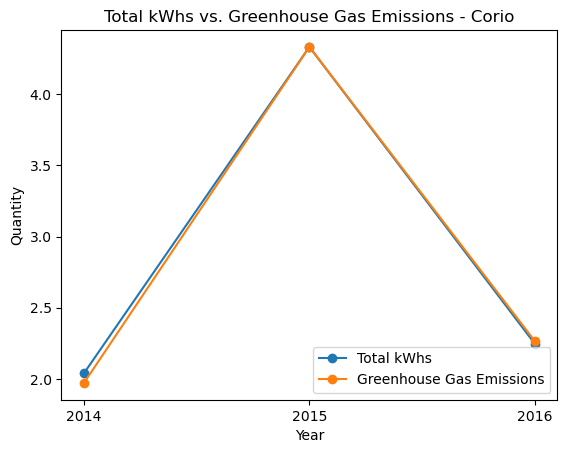

In [114]:
#Total kWhs vs. Greenhouse Gas Emissions - Corio

corio_data= df[df['City']== 'CORIO']
yearly_data_c = corio_data.groupby('Usage Year').agg({'Total Consumption kWhs': 'sum', 'Green House Gas Emissions (Tonnes)': 'sum'}).reset_index()

plt.plot(yearly_data_c['Usage Year'], yearly_data_c['Total Consumption kWhs'], marker='o', label='Total kWhs')
plt.plot(yearly_data_c['Usage Year'], yearly_data_c['Green House Gas Emissions (Tonnes)'], marker='o', label='Greenhouse Gas Emissions')

plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Total kWhs vs. Greenhouse Gas Emissions - Corio')

plt.legend()

plt.xticks(yearly_emissions.index.astype(int))


plt.show()


In [113]:
#Temporal Analysis-6
#monthly average consumption

monthly_consumption = df.groupby(df['Usage Period From'].dt.to_period('M'))['Total Consumption kWhs'].mean().reset_index()
monthly_consumption = monthly_consumption.rename(columns={'Usage Period From': 'Months', 'Total Consumption kWhs': 'Average Consumption KWhs'})

monthly_consumption

,Months,Average Consumption KWhs
0,2014-07,0.034395
1,2014-08,0.045604
2,2014-09,0.042790
3,2014-10,0.041216
4,2014-11,0.042581
5,2014-12,0.039545
6,2015-01,0.037142
7,2015-02,0.039730
8,2015-03,0.044551
9,2015-04,0.040423


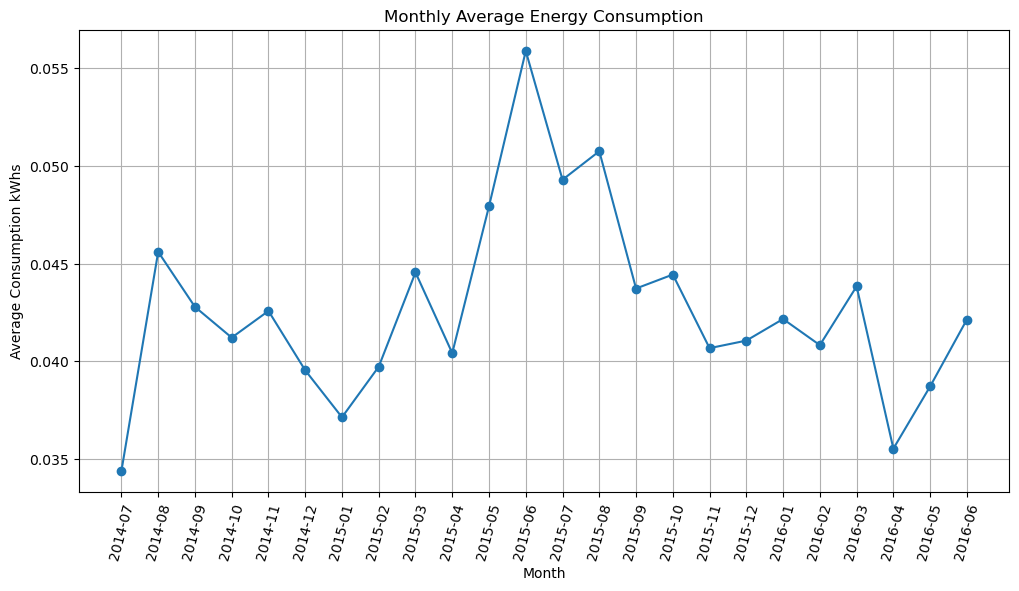

In [112]:
monthly_consumption['Months'] = monthly_consumption['Months'].astype(str)

plt.figure(figsize=(12, 6))

plt.plot(monthly_consumption['Months'], monthly_consumption['Average Consumption KWhs'], marker='o')
plt.xlabel('Month')
plt.ylabel('Average Consumption kWhs')
plt.title('Monthly Average Energy Consumption')
plt.xticks(rotation=75)
plt.grid(True)
plt.show()
